In [24]:
from ci_watson.artifactory_helpers import get_bigdata
from astropy.io import fits
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, collect_pipeline_cfgs
from jwst.pipeline import Spec2Pipeline
from jwst.background import BackgroundStep
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
from jwst.flatfield import FlatFieldStep
from jwst.photom import PhotomStep
from astropy.utils.data import download_file
from scipy import interpolate
from jwst.datamodels import ImageModel, CubeModel, RampModel
import crds
import os
import glob
from jwst import datamodels

In [8]:
Slitlessfile = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_tso3',
                                    'tso3_miri_test',
                                    'pipetest_miri_lrs_tso_100G10I.fits')

In [7]:
if not os.path.exists('../cfg_files/'):
    os.mkdir('../cfg_files/')
    cfgs = collect_pipeline_cfgs.collect_pipeline_cfgs(dst='../cfg_files/')

In [10]:
# Box file location:
det1 = Detector1Pipeline.call(Slitlessfile, config_file='../cfg_files/calwebb_detector1.cfg', save_results=True)

2020-12-14 12:55:35,544 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'pars-rscd_step'
2020-12-14 12:55:35,617 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2020-12-14 12:55:35,618 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2020-12-14 12:55:35,619 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2020-12-14 12:55:35,621 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2020-12-14 12:55:35,623 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2020-12-14 12:55:35,624 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2020-12-14 12:55:35,626 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2020-12-14 12:55:35,627 - stpipe.Detector1Pipeline.rscd - INFO - RSCD_Step instance created.
2020-12-14 12:55:35,629 - stpipe.Detector1Pipeline.firstframe - INFO - First

2020-12-14 12:55:36,772 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_miri_saturation_0022.fits'.
2020-12-14 12:55:36,826 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.
2020-12-14 12:55:36,827 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.
2020-12-14 12:55:36,828 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.
2020-12-14 12:55:36,830 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...
2020-12-14 12:55:37,213 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).
2020-12-14 12:55:37,215 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'ou

2020-12-14 12:58:41,444 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done
2020-12-14 12:58:41,620 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix running with args (<RampModel(10, 100, 416, 72) from pipetest_miri_lrs_tso_100G10I.fits>,).
2020-12-14 12:58:41,622 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2020-12-14 12:58:41,633 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = True
2020-12-14 12:58:41,634 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = True
2020-12-14 12:58:41,635 - st

2020-12-14 13:00:02,689 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation'}
2020-12-14 13:00:02,796 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-12-14 13:00:02,797 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-12-14 13:00:02,800 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-12-14 13:00:03,023 - stpipe.Detector1Pipeline - INFO - Saved model in pipetest_miri_lrs_tso_100G10I_rateints.fits
2020-12-14 13:00:03,025 - stpipe.Detector1Pipeline - INFO - ... ending calwebb_detector1
2020-12-14 13:00:03,108 - stpipe.Detector1Pipeline - INFO - Saved model in pipet

In [11]:
rifile = glob.glob('*_rateints.fits')
print(rifile)

det1_ints = datamodels.open(rifile[0])

['astropy-download-42532-ivkm6fmx_rateints.fits', 'astropy-download-99284-qwh5myk9_rateints.fits', 'astropy-download-53841-asuajcx6_rateints.fits', 'det_image_seq1_MIRIMAGE_P750Lexp1_rateints.fits', 'astropy-download-39212-txjqvc_9_rateints.fits', 'astropy-download-66702-0k0akgrg_rateints.fits', 'pipetest_miri_lrs_tso_100G10I_rateints.fits']


In [12]:
awcs = AssignWcsStep.call(det1_ints, config_file='../cfg_files/assign_wcs.cfg', save_results=True)

2020-12-14 13:00:35,942 - stpipe.assign_wcs - INFO - AssignWcsStep instance created.
2020-12-14 13:00:35,996 - stpipe.assign_wcs - INFO - Step assign_wcs running with args (<CubeModel(10, 416, 72) from astropy-download-42532-ivkm6fmx_rateints.fits>,).
2020-12-14 13:00:35,997 - stpipe.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-12-14 13:00:38,461 - stpipe.assign_wcs - INFO - Created a MIRI mir_lrs-slitless pipeline with references {'distortion': '/grp/crds/cache/references/jwst/jwst_miri_distortion_0028.asdf', 'filteroffset': None, 'specwcs': '/grp/crds/cache/references/jwst/jwst_miri_specwcs_0003.fits', 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disp

In [13]:
ff = FlatFieldStep.call(awcs, config_file='../cfg_files/flat_field.cfg', save_results='True')

2020-12-14 13:00:38,947 - stpipe.flat_field - INFO - FlatFieldStep instance created.
2020-12-14 13:00:39,011 - stpipe.flat_field - INFO - Step flat_field running with args (<CubeModel(10, 416, 72) from astropy-download-42532-ivkm6fmx_assign_wcs.fits>,).
2020-12-14 13:00:39,012 - stpipe.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False}
2020-12-14 13:00:39,317 - stpipe.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-12-14 13:00:39,318 - stpipe.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2020-12-14 13:00:39,319 - stpipe.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR 

In [14]:
pho = PhotomStep.call(ff, config_file='../cfg_files/photom.cfg', save_results='True')

2020-12-14 13:00:39,785 - stpipe.photom - INFO - PhotomStep instance created.
2020-12-14 13:00:39,850 - stpipe.photom - INFO - Step photom running with args (<CubeModel(10, 416, 72) from astropy-download-42532-ivkm6fmx_flat_field.fits>,).
2020-12-14 13:00:39,852 - stpipe.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-12-14 13:00:39,942 - stpipe.photom - INFO - Using photom reference file: /grp/crds/cache/references/jwst/jwst_miri_photom_0071.fits
2020-12-14 13:00:39,945 - stpipe.photom - INFO - Using area reference file: N/A
2020-12-14 13:00:40,008 - stpipe.photom - WARNING - /Users/kmurray/anaconda3/envs/pipeline7.5/lib/python3.8/site-packages/gwcs/wcs.py:131: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (

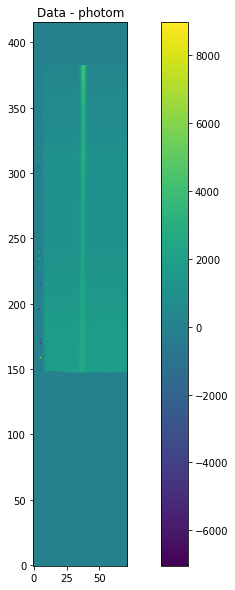

In [15]:
fig = plt.figure(figsize=[12,10])
plt.imshow(pho.data[0,:,:], origin='lower')
plt.title('Data - photom')
plt.colorbar()

In [16]:
phoreffile = pho.meta.ref_file.photom.name
file = phoreffile.split("/")[2]
basename = crds.core.config.pop_crds_uri(phoreffile)
path = crds.locate_file(basename, "jwst")
reffile = datamodels.open(path)

2020-12-14 13:05:21,645 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/pipeline7.5/lib/python3.8/site-packages/gwcs/wcs.py:131: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  transforms = np.array(self._pipeline[from_ind: to_ind])[:, 1].copy()



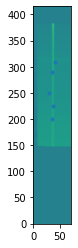

In [29]:
point1 = (36,290)
ra1, dec1, wave1 = pho.meta.wcs(point1[0],point1[1])
point2 = (36,200)
ra2, dec2, wave2 = pho.meta.wcs(point2[0],point2[1])
point3 = (37,225)
ra3, dec3, wave3 = pho.meta.wcs(point3[0],point3[1])
point4 = (42,310)
ra4, dec4, wave4 = pho.meta.wcs(point4[0],point4[1])
point5 = (30,250)
ra5, dec5, wave5 = pho.meta.wcs(point5[0],point5[1])
plt.imshow(pho.data[0], origin='lower')
plt.plot([point1[0],point2[0],point3[0],point4[0],point5[0]],[point1[1],point2[1],point3[1],point4[1],point5[1]],'.')
plt.show()
xpts = [point1[0], point2[0], point3[0], point4[0], point5[0]]
ypts = [point1[1], point2[1], point3[1], point4[1], point5[1]]

In [20]:
ra1, dec1, wave_1 = pho.meta.wcs(point1[0],point1[1])
ra2, dec2, wave_2 = pho.meta.wcs(point2[0],point2[1])
ra3, dec3, wave_3 = pho.meta.wcs(point3[0],point3[1])
ra4, dec4, wave_4 = pho.meta.wcs(point4[0],point4[1])
ra5, dec5, wave_5 = pho.meta.wcs(point5[0],point5[1])

waves = [wave_1, wave_2, wave_3, wave_4, wave_5]

In [22]:
wavelocs = []
relresp = []


wloc = [np.argmin(np.abs(reffile.phot_table['wavelength'] - ww)) for ww in waves]
wmatch = [reffile.phot_table['wavelength'][0,ll] for ll in wloc]
wmatch_plus = [reffile.phot_table['wavelength'][0,ll+1] for ll in wloc]
wmatch_minus = [reffile.phot_table['wavelength'][0,ll-1] for ll in wloc]
relresp = [reffile.phot_table['relresponse'][0,ll] for ll in wloc]

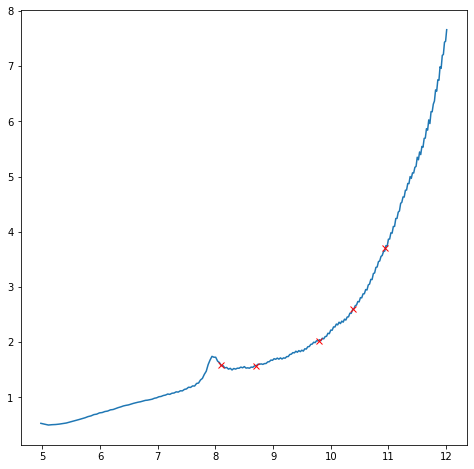

In [25]:
f = interpolate.interp1d(reffile.phot_table['wavelength'][0,:], reffile.phot_table['relresponse'][0,:])
iresp = [f(ww) for ww in waves]

# plot for sanity check!
plt.figure(figsize=[8,8])
plt.plot(reffile.phot_table['wavelength'][0,:], reffile.phot_table['relresponse'][0,:])
plt.plot(waves, iresp, 'rx', label='interpolated points')
plt.show()

In [27]:
fconv = [reffile.phot_table['photmjsr'][0] * ir for ir in iresp]
print(fconv)

[55.38045129741542, 130.3850202516898, 91.40632416687826, 55.55319233912916, 71.49935991826705]


In [32]:
dratio = [pho.data[0,yy,xx]/ff.data[0,yy,xx] for xx,yy in zip(xpts, ypts)]

# print these numbers next to each other to see if they match
print('Ratio of data points     Calculated conversion factor')
for rr, ff in zip(dratio, fconv):
    print('{0:.5f}                {1:.5f}'.format(rr,ff))
    assert np.isclose(rr,ff, rtol=1e-6), "Numbers don't match to within 1e-6"

Ratio of data points     Calculated conversion factor
55.38045                55.38045
130.38503                130.38502
91.40633                91.40632
55.55319                55.55319
71.49936                71.49936


# Leftover code below

In [ ]:
flatfile = datamodels.open(ff)
print(np.shape(flatfile))
print(np.shape(pho))
print(flatfile.data[0,point1[1],point1[0]])
print(pho.data[0,point1[1],point1[0]])

In [ ]:
flat1_math = flatfile.data[0,point1[1],point1[0]] * conv_fact1
print(flat1_math)
print(pho.data[0,point1[1],point1[0]])

In [ ]:
flat2_math = flatfile.data[0,point2[1],point2[0]] * conv_fact2
print(flat2_math)
print(pho.data[0,point2[1],point2[0]])

In [ ]:
flat3_math = flatfile.data[0,point3[1],point3[0]] * conv_fact3
print(flat3_math)
print(pho.data[0,point3[1],point3[0]])

In [ ]:
flat4_math = flatfile.data[0,point4[1],point4[0]] * conv_fact4
print(flat4_math)
print(pho.data[0,point4[1],point4[0]])

In [ ]:
flat5_math = flatfile.data[0,point5[1],point5[0]] * conv_fact5
print(flat5_math)
print(pho.data[0,point5[1],point5[0]])